# Texto y anotación

Crear una buena visualización implica guiar al lector para que la figura cuente una historia.
En algunos casos, esta historia puede contarse de forma totalmente visual, sin necesidad de añadir texto, pero en otros son necesarias pequeñas pistas textuales y etiquetas.
Quizá los tipos más básicos de anotaciones que utilizará sean las etiquetas y los títulos de los ejes, pero las opciones van más allá.

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('classic')
import numpy as np
import pandas as pd

## Ejemplo: Efecto de las vacaciones en los nacimientos en EE.UU.

Volvamos a algunos datos con los que trabajamos anteriormente, donde generamos un gráfico de la media de nacimientos a lo largo del año natural.

In [3]:
births = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')          #filtrar los datos para que sean normales

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.Timestamp(2012, month, day)
                        for (month, day) in births_by_date.index]

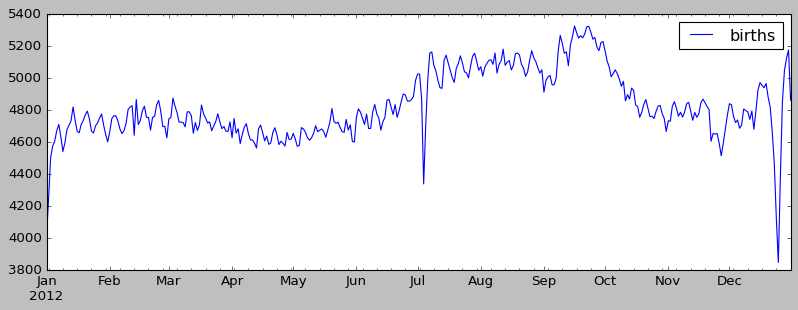

In [4]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

Cuando comunicamos datos de este tipo, a menudo resulta útil anotar ciertas características del gráfico para llamar la atención del lector.
Esto puede hacerse manualmente con el comando ``plt.text``/``ax.text``, que colocará texto en un valor x/y concreto:

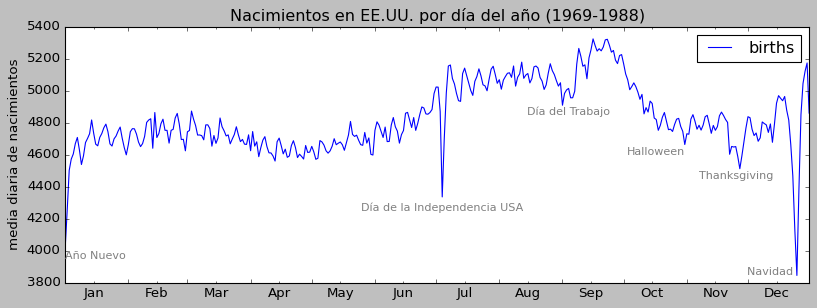

In [5]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Añadir etiquetas al gráfico
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "Año Nuevo", **style)
ax.text('2012-7-4', 4250, "Día de la Independencia USA", ha='center', **style)
ax.text('2012-9-4', 4850, "Día del Trabajo", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Navidad ", ha='right', **style)

# Rotular los ejes
ax.set(title='Nacimientos en EE.UU. por día del año (1969-1988)',
       ylabel='media diaria de nacimientos')

# Formatear el eje x con etiquetas de mes centradas
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

El método ``ax.text`` toma una posición x, una posición y, una cadena, y luego palabras clave opcionales que especifican el color, tamaño, estilo, alineación y otras propiedades del texto.
Aquí usamos ``ha='right'`` y ``ha='center'``, donde ``ha`` es la abreviatura de *alineación horizontal*.

## Flechas y anotación

Dibujar flechas en Matplotlib es a menudo mucho más difícil de lo que cabría esperar.
Aunque hay una función ``plt.arrow()`` disponible, yo no sugeriría usarla: las flechas que crea son objetos SVG que estarán sujetos a la relación de aspecto variable de sus gráficos, y el resultado rara vez es lo que el usuario pretende.
En su lugar, sugeriría utilizar la función ``plt.annotate()``.
Esta función crea un texto y una flecha, y las flechas se pueden especificar de forma muy flexible.

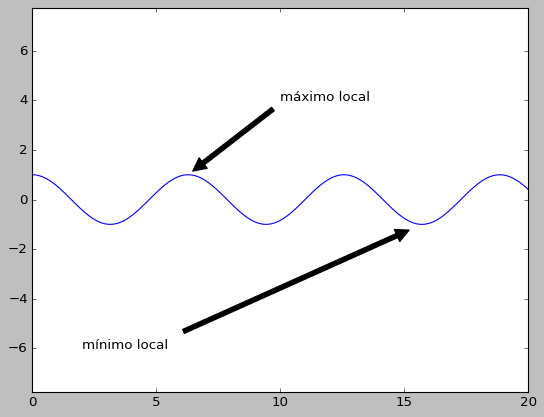

In [6]:
fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('máximo local', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('mínimo local', xy=(5 * np.pi, -1), xytext=(2, -6),
             arrowprops=dict(facecolor='black', shrink=0.05));

El estilo de la flecha se controla a través del diccionario ``arrowprops``, que tiene numerosas opciones disponibles.
Estas opciones están bastante bien documentadas en la documentación online de Matplotlib, así que en lugar de repetirlas aquí probablemente sea más útil mostrar rápidamente algunas de las posibilidades.
Vamos a demostrar varias de las posibles opciones utilizando el gráfico de natalidad de antes:

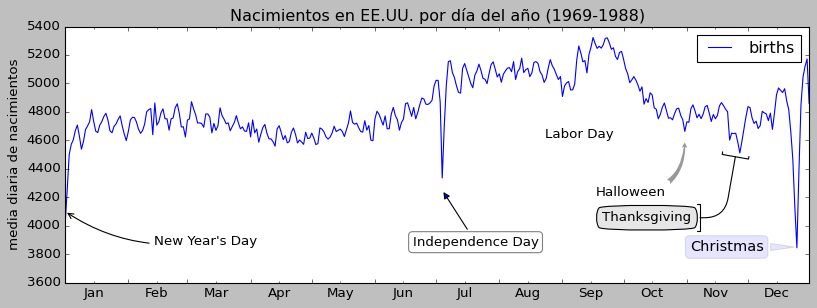

In [7]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Añadir etiquetas al gráfico
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(80, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(30, -50), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="-|>"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(10, -30), textcoords='offset points')

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -50), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="]-[",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))

ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));


# Rotular los ejes
ax.set(title='Nacimientos en EE.UU. por día del año (1969-1988)',
       ylabel='media diaria de nacimientos')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);

<!--NAVIGATION-->
< [Multiple Subplots](8-Multiple-Subplots.ipynb) | [Seaborn](9-Visualizacion_con_Seaborn.ipynb) >
